In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import matplotlib
import matplotlib.colors as mcolors

File reading function

In [62]:

def ceilo_import(fnames):

    time_list = []
    raw_spectrum = []
    for ii in np.arange(len(fnames)):
        allData = open(fnames[ii], 'r')
        print(fnames[ii])
        cnt = 0
        cnt_to_4 = -1000
        for line in allData:
            if line.find('CS0001004')>0:
                cnt_to_4 = 0

            if cnt_to_4 == 4:
                split_line = line.split(',')

                time_list.append(datetime.strptime(split_line[0][1:-1], '%Y-%m-%d %I:%M:%S %p') )
                if (time_list[-1].hour == 12) & (split_line[0][-3:-1]=='AM'):
                    time_list[-1] = datetime(year = time_list[-1].year, month = time_list[-1].month\
                                             , day = time_list[-1].day, hour = 0, minute= time_list[-1].minute,\
                                             second = time_list[-1].second)

                if time_list[-1] < datetime(2019, 10, 16, 19, 41, 18):
                    time_list[-1] = time_list[-1] + timedelta(hours=4)
                
                line_decimal = []
                for i in range(2048):
                    back_scat = int(split_line[1][5*i:5*i+5],16)
                    if back_scat>524287:
                        back_scat += -1048576
                    line_decimal.append(back_scat)

                raw_spectrum.append(line_decimal)
            elif cnt_to_4 == 1:
                line1 = line
            elif cnt_to_4 == 2:
                line2 = line
            elif cnt_to_4 == 3:
                line3 = line
            elif cnt_to_4 == 5:
                line5 = line
            elif cnt_to_4 == 6:
                line6 = line

            cnt_to_4 += 1
            cnt += 1
        allData.close()

        # raw_spectrum_df = pd.DataFrame()
        
    return time_list, raw_spectrum
    


Gault_Data/Ceilo/2019-10-16.txt
Gault_Data/Ceilo/2019-10-17.txt
Gault_Data/Ceilo/2019-10-18.txt


/Users/lacm2126/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:60: RuntimeWarning: divide by zero encountered in log10
/Users/lacm2126/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:60: RuntimeWarning: invalid value encountered in log10


Reading and resampling

In [ ]:
fname0 = 'Gault_Data/Ceilo/2019-10-16.txt'
fname1 = 'Gault_Data/Ceilo/2019-10-17.txt'
fname2 = 'Gault_Data/Ceilo/2019-10-18.txt'
fnames = [fname0,fname1,fname2]

time_list, raw_spectrum = ceilo_import(fnames)

raw_spectrum = np.array(raw_spectrum) * 10**-8
raw_spectrum_log = np.log10(raw_spectrum)

df = pd.DataFrame(raw_spectrum_log, index=time_list)
resam_df = df.resample('1min').mean()
resam_df_5min = df.resample('5min').mean()

Plotting

In [ ]:
colors = plt.cm.ocean(np.linspace(1,0,256))
# generating a smoothly-varying LinearSegmentedColormap
cmap = mcolors.LinearSegmentedColormap.from_list('colormap', colors)

g_df = resam_df_5min
st = np.arange(len(g_df))[g_df.index>datetime(year=2019,month=10,day=16,hour=21,minute=0)][0]
en = np.arange(len(g_df))[g_df.index>datetime(year=2019,month=10,day=18,hour=5,minute=0)][0]

fig, ax = plt.subplots(1, figsize=(10,2))
cst = ax.contourf(g_df.index[st:en], np.arange(2048)*5+100, g_df[st:en].T,100,cmap=cmap)

ax.set_xlabel('Time')
ax.set_ylabel('Height [m]')
# ax.set_xlim([datetime(year=2019,month=10,day=16,hour=3), datetime(year=2019,month=10,day=16,hour=9)])
ax.xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%H:%M'))

ax.set_ylim([0,6000])


cbZe=fig.colorbar(cst, ax=ax)
cbZe.set_label(r'[sr$^-1$ m$^-1$]')
cbZe.set_ticks([-7,-6,-5,-4])
cbZe.set_ticklabels([r'$10^{-7}$',r'$10^{-6}$',r'$10^{-5}$',r'$10^{-4}$'])
plt.tight_layout()

plt.savefig('20191017_ceilo.png', format='png',bbox_to_anchor='tight' )


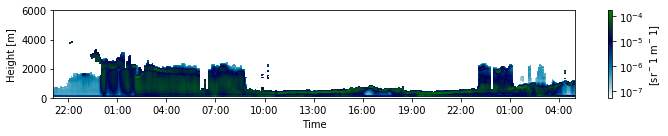